In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [107]:
data = pd.read_csv('/content/drive/MyDrive/ARTIFICIAL INTELLIGENCE DEGREE UAB/AI 2nd course 2nd semester/Synthesis Project/BET990000_658258.csv')

<ipython-input-107-3a21a572f8a9>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/ARTIFICIAL INTELLIGENCE DEGREE UAB/AI 2nd course 2nd semester/Synthesis Project/BET990000_658258.csv')


In [108]:
data.head()

,Unnamed: 0,PROJECT_ID,PM,TASK_ID,START,END,TASK_TYPE,SOURCE_LANG,TARGET_LANG,TRANSLATOR,...,CLOSE,FORECAST,HOURLY_RATE,COST,QUALITY_EVALUATION,MANUFACTURER,MANUFACTURER_SECTOR,MANUFACTURER_INDUSTRY_GROUP,MANUFACTURER_INDUSTRY,MANUFACTURER_SUBINDUSTRY
0,0,214198,KMT,10048285.0,2015-09-09 17:29:00,2015-09-10 11:00:00,Engineering,English,Spanish (Iberian),Jeronimo,...,2015-09-10 17:33:07,1.50,20.0,30.00,7.0,HealthyLife,Health Care,Health Care Providers,Health Care Facilities,Long-Term Care Facilities
1,1,213094,PMT,10048285.0,2014-05-01 19:27:00,2014-05-02 19:00:00,Engineering,Catalan,Catalan,Octavi,...,2014-05-02 13:29:44,0.33,15.0,4.95,6.0,AeroSysTech,Information Technology,Software & Services,Application Software,Systems Software
2,2,212331,PMT,10048285.0,2013-11-01 13:13:00,2013-10-31 19:00:00,Miscellaneous,Catalan,Catalan,Victor,...,2013-10-31 13:18:34,0.00,11.0,0.00,8.0,SunTech,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"
3,3,211096,PMT,10048285.0,2012-10-26 17:24:00,2012-11-30 19:00:00,Miscellaneous,English,Galician,Severino,...,2012-11-30 13:38:12,3.10,16.0,49.60,8.0,NexisOne,Technology Hardware,Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"
4,4,213869,BMT,10048285.0,2015-03-03 14:04:00,2015-03-03 14:05:00,Miscellaneous,Catalan,Catalan,Pau,...,2015-03-04 17:55:28,0.33,14.0,4.62,6.0,HealthyLife,Health Care,Health Care Providers,Health Care Facilities,Long-Term Care Facilities


Let's add the quality/cost coefficient column

In [109]:
data['QUALITY_COST_RATIO'] = data['QUALITY_EVALUATION'] / data['HOURLY_RATE']

In [110]:
data = data.drop(data.columns[0],axis=1)

In [111]:
data.head()

,PROJECT_ID,PM,TASK_ID,START,END,TASK_TYPE,SOURCE_LANG,TARGET_LANG,TRANSLATOR,ASSIGNED,...,FORECAST,HOURLY_RATE,COST,QUALITY_EVALUATION,MANUFACTURER,MANUFACTURER_SECTOR,MANUFACTURER_INDUSTRY_GROUP,MANUFACTURER_INDUSTRY,MANUFACTURER_SUBINDUSTRY,QUALITY_COST_RATIO
0,214198,KMT,10048285.0,2015-09-09 17:29:00,2015-09-10 11:00:00,Engineering,English,Spanish (Iberian),Jeronimo,2015-09-09 17:31:52,...,1.50,20.0,30.00,7.0,HealthyLife,Health Care,Health Care Providers,Health Care Facilities,Long-Term Care Facilities,0.350000
1,213094,PMT,10048285.0,2014-05-01 19:27:00,2014-05-02 19:00:00,Engineering,Catalan,Catalan,Octavi,2014-05-02 13:29:33,...,0.33,15.0,4.95,6.0,AeroSysTech,Information Technology,Software & Services,Application Software,Systems Software,0.400000
2,212331,PMT,10048285.0,2013-11-01 13:13:00,2013-10-31 19:00:00,Miscellaneous,Catalan,Catalan,Victor,2013-10-31 13:14:35,...,0.00,11.0,0.00,8.0,SunTech,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",0.727273
3,211096,PMT,10048285.0,2012-10-26 17:24:00,2012-11-30 19:00:00,Miscellaneous,English,Galician,Severino,2012-10-26 17:25:26,...,3.10,16.0,49.60,8.0,NexisOne,Technology Hardware,Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",0.500000
4,213869,BMT,10048285.0,2015-03-03 14:04:00,2015-03-03 14:05:00,Miscellaneous,Catalan,Catalan,Pau,2015-03-04 13:26:14,...,0.33,14.0,4.62,6.0,HealthyLife,Health Care,Health Care Providers,Health Care Facilities,Long-Term Care Facilities,0.428571


In [112]:
len(data)

658258

In [113]:
data = data[data['COST'] != 0]
data = data[data['HOURLY_RATE'] != 0]

In [114]:
len(data)

615144

In [115]:
data.tail()

,PROJECT_ID,PM,TASK_ID,START,END,TASK_TYPE,SOURCE_LANG,TARGET_LANG,TRANSLATOR,ASSIGNED,...,FORECAST,HOURLY_RATE,COST,QUALITY_EVALUATION,MANUFACTURER,MANUFACTURER_SECTOR,MANUFACTURER_INDUSTRY_GROUP,MANUFACTURER_INDUSTRY,MANUFACTURER_SUBINDUSTRY,QUALITY_COST_RATIO
658253,280239,KMT,11222682.0,2022-11-01 09:07:00,2022-11-30 19:00:00,LanguageLead,English,Spanish (Iberian),Ascension,2022-12-02 09:47:05,...,73.20,14.0,1024.80,7.0,AutoPlanner,Information Technology,Software & Services,Application Software,Application Software,0.500000
658254,220889,RMT,11222683.0,2022-12-02 09:50:00,2022-12-02 21:59:00,Translation,English,Galician,Casiano,2022-12-02 10:24:01,...,0.17,21.0,3.57,8.0,TrueConnect,Communication Services,Interactive Media & Services,Internet Services & Infrastructure,Internet Services & Infrastructure,0.380952
658255,220889,RMT,11222685.0,2022-12-02 09:50:13,2022-12-05 13:00:00,Translation,English,Galician,Artur Fulgencio,2022-12-02 10:24:56,...,0.67,21.0,14.07,9.0,TrueConnect,Communication Services,Interactive Media & Services,Internet Services & Infrastructure,Internet Services & Infrastructure,0.428571
658256,220889,RMT,11222686.0,2022-12-05 13:00:00,2022-12-05 21:59:00,ProofReading,English,Galician,Casiano,2022-12-02 10:25:04,...,0.34,21.0,7.14,7.0,TrueConnect,Communication Services,Interactive Media & Services,Internet Services & Infrastructure,Internet Services & Infrastructure,0.333333
658257,220783,PMT,11222687.0,2022-12-02 09:50:18,2022-12-02 18:00:00,Miscellaneous,English,Spanish (Global),Constantino Carmen,2022-12-02 15:32:48,...,0.25,14.0,3.50,8.0,AgroTech Industries,Industrials,Capital Goods,Industrial Machinery,Agricultural and Farm Machinery,0.571429


In [116]:
time_columns = ['START', 'END', 'ASSIGNED', 'READY', 'WORKING', 'DELIVERED', 'RECEIVED', 'CLOSE', 'FORECAST']
data = data.drop(columns=time_columns)

In [117]:
data

,PROJECT_ID,PM,TASK_ID,TASK_TYPE,SOURCE_LANG,TARGET_LANG,TRANSLATOR,HOURLY_RATE,COST,QUALITY_EVALUATION,MANUFACTURER,MANUFACTURER_SECTOR,MANUFACTURER_INDUSTRY_GROUP,MANUFACTURER_INDUSTRY,MANUFACTURER_SUBINDUSTRY,QUALITY_COST_RATIO
0,214198,KMT,10048285.0,Engineering,English,Spanish (Iberian),Jeronimo,20.0,30.00,7.0,HealthyLife,Health Care,Health Care Providers,Health Care Facilities,Long-Term Care Facilities,0.350000
1,213094,PMT,10048285.0,Engineering,Catalan,Catalan,Octavi,15.0,4.95,6.0,AeroSysTech,Information Technology,Software & Services,Application Software,Systems Software,0.400000
3,211096,PMT,10048285.0,Miscellaneous,English,Galician,Severino,16.0,49.60,8.0,NexisOne,Technology Hardware,Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",0.500000
4,213869,BMT,10048285.0,Miscellaneous,Catalan,Catalan,Pau,14.0,4.62,6.0,HealthyLife,Health Care,Health Care Providers,Health Care Facilities,Long-Term Care Facilities,0.428571
7,207290,BMT,10098287.0,Engineering,English,Spanish (Iberian),Maria Alexandra,20.0,5.00,7.0,DesarrolloYa,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658253,280239,KMT,11222682.0,LanguageLead,English,Spanish (Iberian),Ascension,14.0,1024.80,7.0,AutoPlanner,Information Technology,Software & Services,Application Software,Application Software,0.500000
658254,220889,RMT,11222683.0,Translation,English,Galician,Casiano,21.0,3.57,8.0,TrueConnect,Communication Services,Interactive Media & Services,Internet Services & Infrastructure,Internet Services & Infrastructure,0.380952
658255,220889,RMT,11222685.0,Translation,English,Galician,Artur Fulgencio,21.0,14.07,9.0,TrueConnect,Communication Services,Interactive Media & Services,Internet Services & Infrastructure,Internet Services & Infrastructure,0.428571
658256,220889,RMT,11222686.0,ProofReading,English,Galician,Casiano,21.0,7.14,7.0,TrueConnect,Communication Services,Interactive Media & Services,Internet Services & Infrastructure,Internet Services & Infrastructure,0.333333


In [118]:
data = data.drop(['PROJECT_ID', 'TASK_ID'], axis=1)

In [119]:
data

,PM,TASK_TYPE,SOURCE_LANG,TARGET_LANG,TRANSLATOR,HOURLY_RATE,COST,QUALITY_EVALUATION,MANUFACTURER,MANUFACTURER_SECTOR,MANUFACTURER_INDUSTRY_GROUP,MANUFACTURER_INDUSTRY,MANUFACTURER_SUBINDUSTRY,QUALITY_COST_RATIO
0,KMT,Engineering,English,Spanish (Iberian),Jeronimo,20.0,30.00,7.0,HealthyLife,Health Care,Health Care Providers,Health Care Facilities,Long-Term Care Facilities,0.350000
1,PMT,Engineering,Catalan,Catalan,Octavi,15.0,4.95,6.0,AeroSysTech,Information Technology,Software & Services,Application Software,Systems Software,0.400000
3,PMT,Miscellaneous,English,Galician,Severino,16.0,49.60,8.0,NexisOne,Technology Hardware,Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",0.500000
4,BMT,Miscellaneous,Catalan,Catalan,Pau,14.0,4.62,6.0,HealthyLife,Health Care,Health Care Providers,Health Care Facilities,Long-Term Care Facilities,0.428571
7,BMT,Engineering,English,Spanish (Iberian),Maria Alexandra,20.0,5.00,7.0,DesarrolloYa,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals",0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658253,KMT,LanguageLead,English,Spanish (Iberian),Ascension,14.0,1024.80,7.0,AutoPlanner,Information Technology,Software & Services,Application Software,Application Software,0.500000
658254,RMT,Translation,English,Galician,Casiano,21.0,3.57,8.0,TrueConnect,Communication Services,Interactive Media & Services,Internet Services & Infrastructure,Internet Services & Infrastructure,0.380952
658255,RMT,Translation,English,Galician,Artur Fulgencio,21.0,14.07,9.0,TrueConnect,Communication Services,Interactive Media & Services,Internet Services & Infrastructure,Internet Services & Infrastructure,0.428571
658256,RMT,ProofReading,English,Galician,Casiano,21.0,7.14,7.0,TrueConnect,Communication Services,Interactive Media & Services,Internet Services & Infrastructure,Internet Services & Infrastructure,0.333333


In [127]:
data.to_csv(path_or_buf='Synthesis_data_final')

In [120]:
# Label Encoding for categorical variables except 'TRANSLATOR'.
for column in data.columns:
    if data[column].dtype == type(object) and column != 'TRANSLATOR':
        le = preprocessing.LabelEncoder()
        data[column] = le.fit_transform(data[column])

# Separate LabelEncoder for 'TRANSLATOR'
le_translator = preprocessing.LabelEncoder()
data['TRANSLATOR'] = le_translator.fit_transform(data['TRANSLATOR'])

In [121]:
from sklearn.model_selection import train_test_split

# Define your features and target
X = data.drop('TRANSLATOR', axis=1)
y = data['TRANSLATOR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [122]:
# Define the classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [129]:
# Predict probabilities
probs = clf.predict_proba(X_test)

# Get the indices of the top 5 translators
top5 = np.argsort(probs, axis=1)[:,-5:]


# Now you can use this LabelEncoder to convert indices back into original names
top5_translators = [list(le_translator.inverse_transform(indices)) for indices in top5]

# Print the top 5 translators (I do it just for 10 examples of the test set just to see how it looks)
for i, translators in enumerate(top5_translators[524:534], start=1):
    print(f"Top 5 translators for task {i} of the test set are: {', '.join(translators)}")


Top 5 translators for task 1 of the test set are: Dalila, Damaso, Corinne, Valeriano Cleofas, Alessio
Top 5 translators for task 2 of the test set are: Dalila, Damaso, Corinne, Valeriano Cleofas, Juan Ramon
Top 5 translators for task 3 of the test set are: Dalila, Damaso, Corinne, Valeriano Cleofas, Acacio Poncio
Top 5 translators for task 4 of the test set are: Dalila, Damaso, Cosme, Valeriano Cleofas, Jorge
Top 5 translators for task 5 of the test set are: Dalila, Damaso, Corinne, Valeriano Cleofas, Karina Anais
Top 5 translators for task 6 of the test set are: Dalila, Damaso, Cosme, Valeriano Cleofas, Gianluigi
Top 5 translators for task 7 of the test set are: Damaso, Cosme Dorotea, Otilia, Enith Blas, Amaru
Top 5 translators for task 8 of the test set are: Daiana Rosario, Dalila, Damian, Valeriano Cleofas, Ildefonso Ambrosio
Top 5 translators for task 9 of the test set are: Damaso, Cosme, Valeriano Cleofas, Honorato, Constantino Kimberly
Top 5 translators for task 10 of the test se

In [124]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score

# Predict the labels
y_pred = clf.predict(X_test)

# Define the classes for the label encoder
translator_classes = le_translator.classes_

# Inverse transform the labels to get the original names
y_test_names = le_translator.inverse_transform(y_test)
y_pred_names = le_translator.inverse_transform(y_pred)

# Print the classification report
print(classification_report(y_test_names, y_pred_names))



# Print the accuracy score
print("Accuracy:", accuracy_score(y_test_names, y_pred_names))

# Print the precision score
print("Precision:", precision_score(y_test_names, y_pred_names, average='macro'))

# Print the recall score. Setting average parameter to 'macro' calculates scores for each label, and finds their unweighted mean.
print("Recall:", recall_score(y_test_names, y_pred_names, average='macro'))

# Print the f1 score. Setting average parameter to 'macro' calculates scores for each label, and finds their unweighted mean.
print("F1 Score:", f1_score(y_test_names, y_pred_names, average='macro'))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

                      precision    recall  f1-score   support

               Aaron       0.33      0.20      0.25         5
               Abdon       0.33      0.67      0.44         3
        Abdon Isaias       0.78      0.74      0.76       637
            Abelardo       0.56      0.58      0.57       388
             Abigail       0.82      0.77      0.80        43
       Abraham Alejo       0.00      0.00      0.00         2
     Acacio Cayetano       0.18      0.17      0.17        90
       Acacio Poncio       0.89      0.91      0.90      2040
           Adalberto       0.12      0.18      0.14        33
  Adalberto Anatolio       0.74      0.87      0.80      1249
                Adan       0.50      0.43      0.46         7
             Addison       0.00      0.00      0.00         3
       Adela Esteban       0.00      0.00      0.00         0
               Adele       0.00      0.00      0.00         1
              Adelia       0.00      0.00      0.00         1
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.45862879533077366


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.45147260979351106
F1 Score: 0.4467644713497707


**Average Accuracy:** 0.45

**Average Recall:** 0.44

**Average F1-Score:** 0.45

We maybe were to ambitious to try to fit every translator, let's just take into account those that have done at least 50 translations:

In [125]:
from sklearn.metrics import classification_report
import numpy as np

def filtered_classification_report(y_true, y_pred, labels, min_support=0):
    # Convert y_true and y_pred to numpy arrays if they are not already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Count the occurrences of each label in y_true
    label_counts = {}
    for label in labels:
        label_counts[label] = np.count_nonzero(y_true == label)

    # Filter out labels with support less than min_support
    filtered_labels = [label for label in labels if label_counts[label] >= min_support]

    # Filter y_true and y_pred based on filtered_labels
    filtered_indices = np.isin(y_true, filtered_labels)
    filtered_y_true = y_true[filtered_indices]
    filtered_y_pred = y_pred[filtered_indices]

    # Find labels with support greater than 0
    labels_with_support = [label for label in filtered_labels if label_counts[label] > 0]

    # Calculate and return the classification report
    report = classification_report(filtered_y_true, filtered_y_pred, labels=labels_with_support)

    return report


In [126]:
import pprint

unique_labels = set(y_test_names)
labels = list(unique_labels)

report = filtered_classification_report(y_test_names, y_pred_names, labels, min_support=50)


print("Classification Report:")
print(report)

Classification Report:
                      precision    recall  f1-score   support

       Mariano Fidel       0.67      0.62      0.64       543
     Isaias Venancio       0.91      0.93      0.92      6277
           Ana Laura       0.76      0.64      0.70       121
             Claudia       0.70      0.77      0.73        52
         Ana Marcela       0.24      0.27      0.25        63
      Maria Fernanda       0.75      0.74      0.74       463
              Carmen       0.76      0.55      0.64        56
     Nieves Leocadia       0.86      0.93      0.90      3007
       David Antonio       0.95      0.94      0.94       455
               Amaro       0.52      0.56      0.54       334
       Felipe Aldana       0.70      0.68      0.69      1007
             Madison       0.56      0.52      0.54       148
             Pio Pio       0.33      0.26      0.29       293
                 Pol       0.64      0.64      0.64      1328
Constantino Kimberly       0.74      0.72     

Look at that! Much better results:

**Average Accuracy:** 0.71

**Average Recall:** 0.68

**Average F1-Score:** 0.69

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


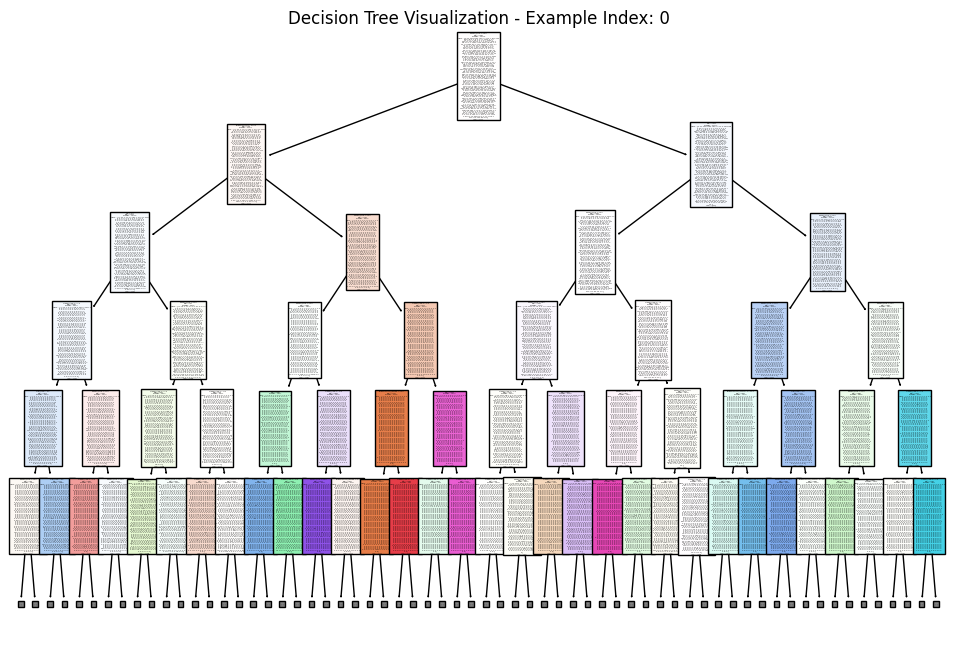

Predicted Class Label: Lucano


In [103]:
import matplotlib.pyplot as plt
from sklearn import tree

# Select a single example for visualization
example_index = 0
example = X_test.iloc[example_index]

# Predict the class label for the selected example
predicted_class = clf.predict([example])[0]

# Create a decision tree plot
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, filled=True, class_names=True, max_depth=5)
plt.title('Decision Tree Visualization - Example Index: {}'.format(example_index))
plt.show()

# Print the predicted class label for the selected example
predicted_class_name = le_translator.inverse_transform([predicted_class])[0]
print('Predicted Class Label:', predicted_class_name)


Let's visualize the tree with a bigger max depth (10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


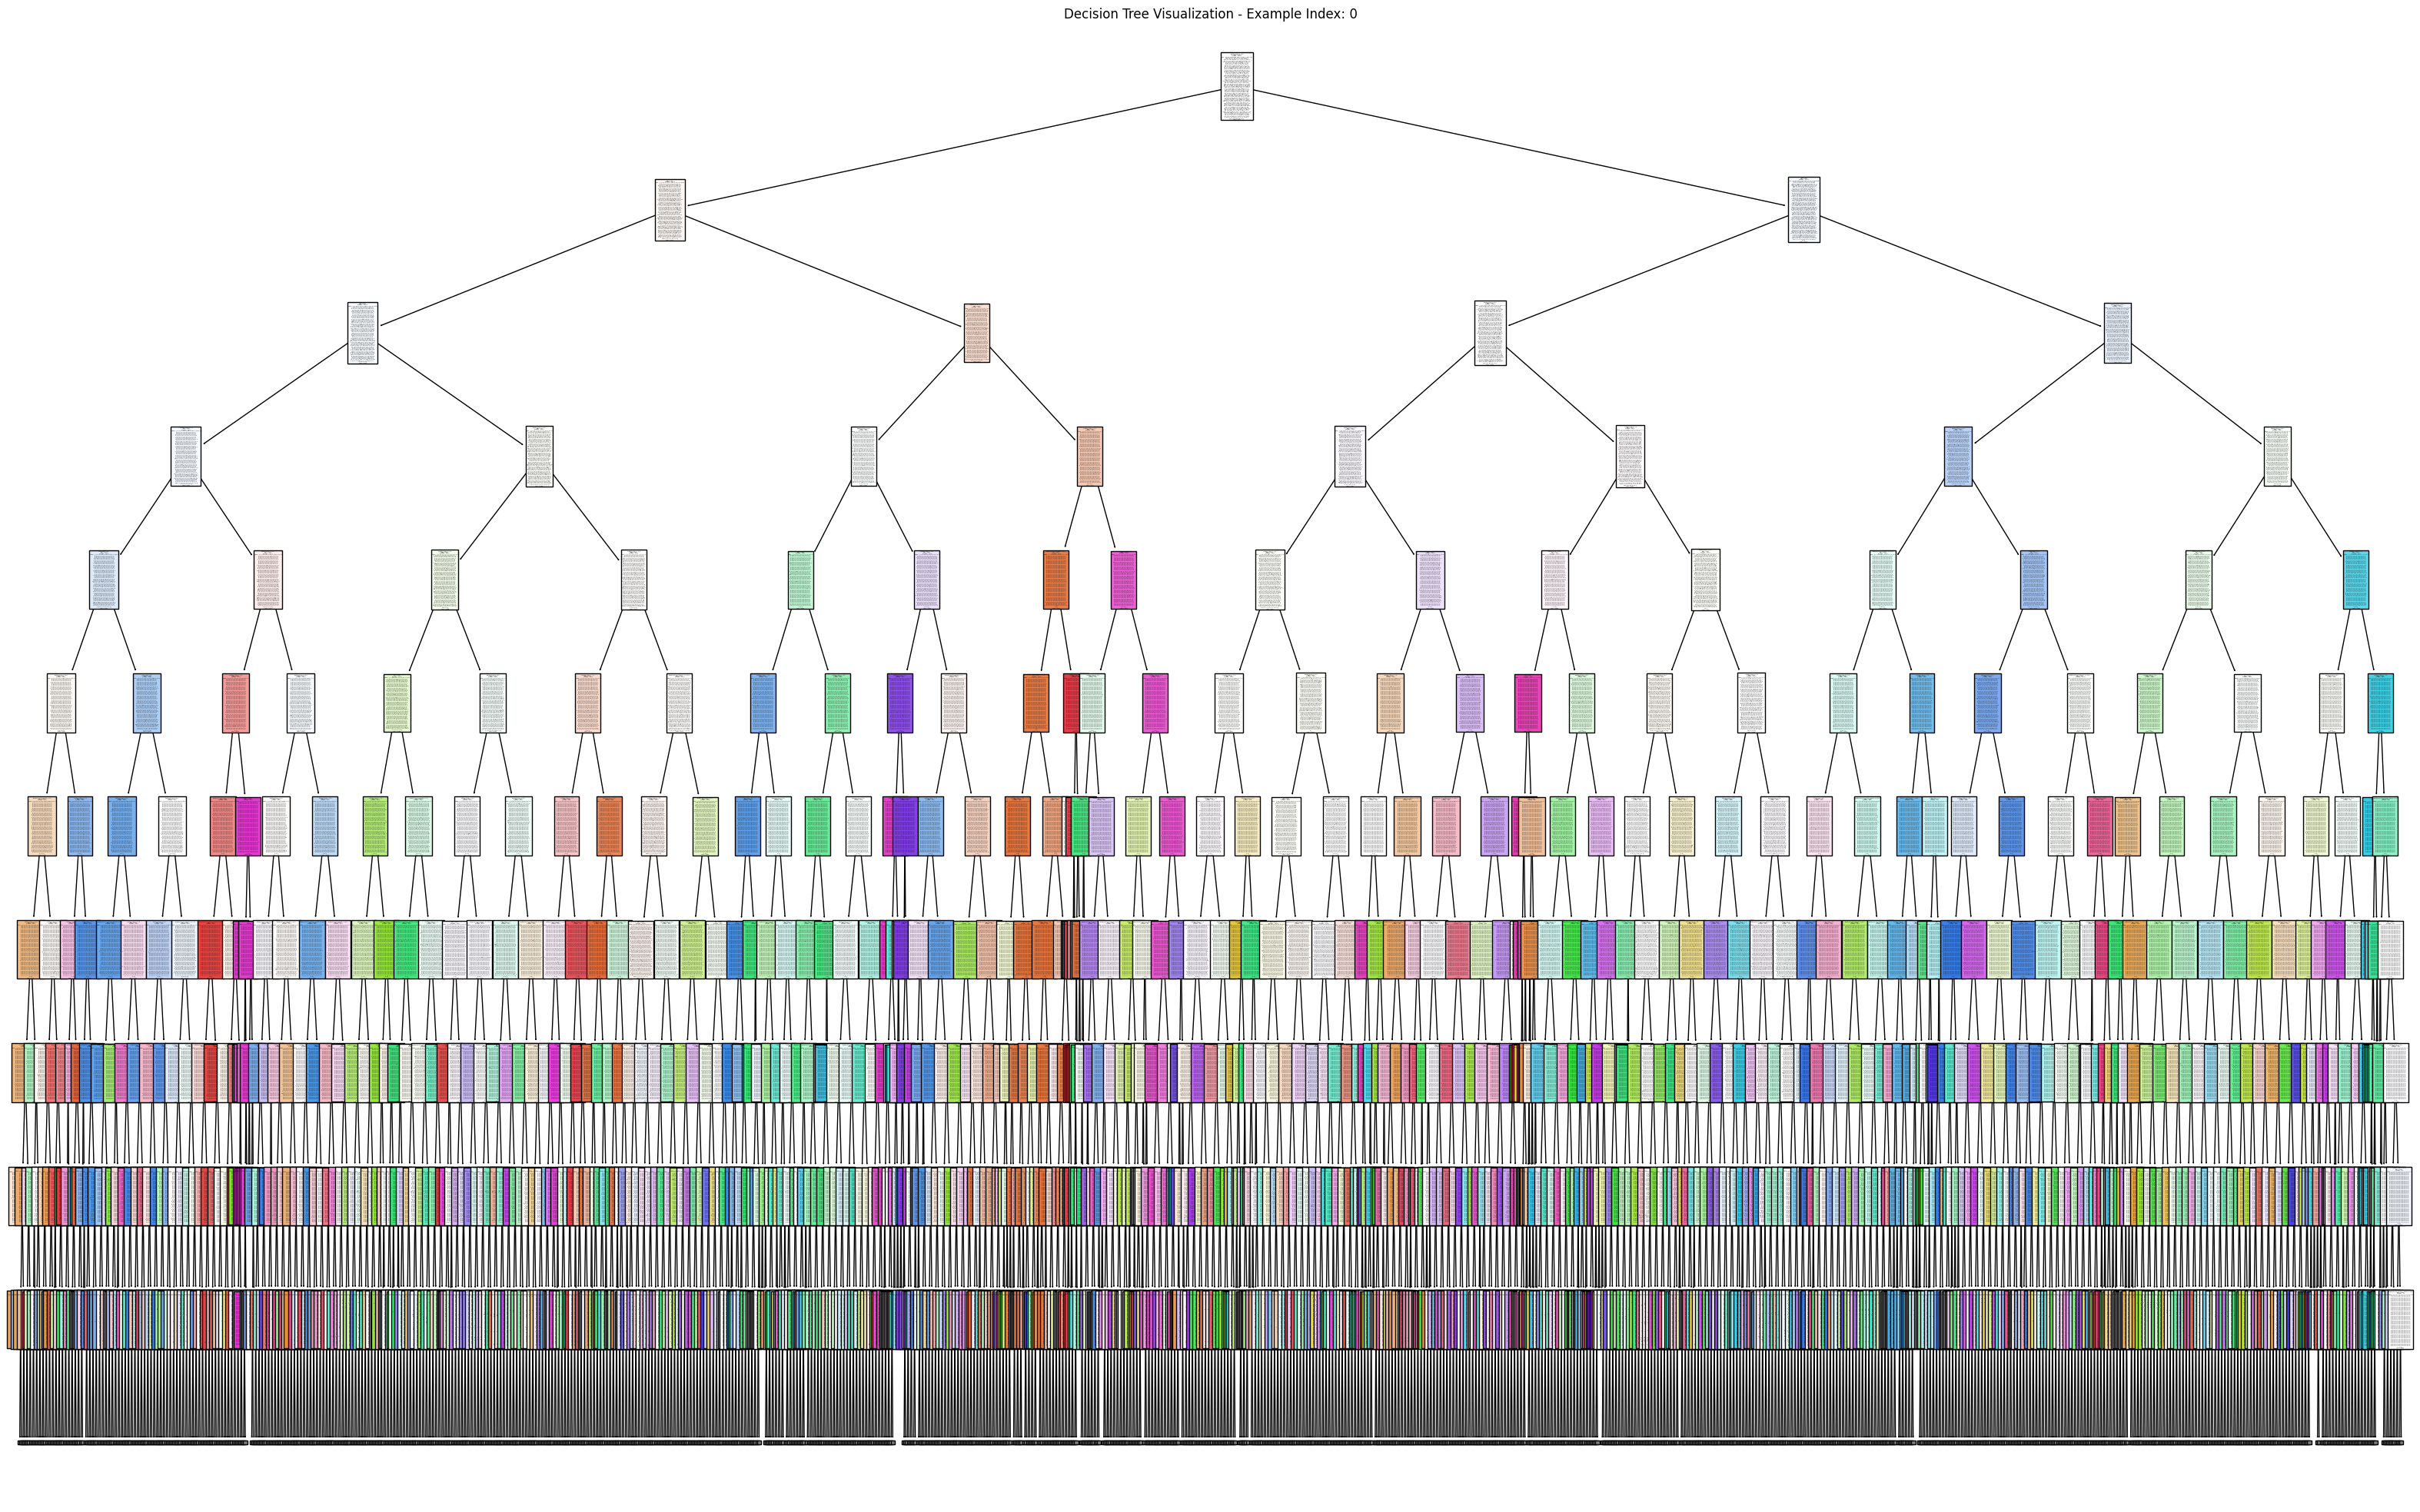

Predicted Class Label: Lucano
Actual Class Label: Lucano


In [76]:
# Select a single example for visualization
example_index = 0
example = X_test.iloc[example_index]

# Predict the class label for the selected example
predicted_class = clf.predict([example])[0]

# Get the actual class label for the selected example
actual_class = y_test.iloc[example_index]

# Create a decision tree plot
plt.figure(figsize=(40, 25))
tree.plot_tree(clf, feature_names=X.columns, filled=True, class_names=True, max_depth=10)
plt.title('Decision Tree Visualization - Example Index: {}'.format(example_index))
plt.show()

# Print the predicted class label and the actual class label for the selected example
predicted_class_name = le_translator.inverse_transform([predicted_class])[0]
actual_class_name = le_translator.inverse_transform([actual_class])[0]

print('Predicted Class Label:', predicted_class_name)
print('Actual Class Label:', actual_class_name)


In [79]:
def print_decisions(tree, node, depth, max_depth):
    if depth > max_depth:
        return

    indent = '  ' * depth

    if tree.tree_.feature[node] != tree.tree_.n_features:
        feature = X.columns[tree.tree_.feature[node]]
        threshold = tree.tree_.threshold[node]

        if example_dict[feature] <= threshold:
            decision = f'{feature} <= {threshold:.4f}'
            print(indent + 'IF ' + decision)
            print_decisions(tree, tree.tree_.children_left[node], depth + 1, max_depth)
        else:
            decision = f'{feature} > {threshold:.4f}'
            print(indent + 'IF ' + decision)
            print_decisions(tree, tree.tree_.children_right[node], depth + 1, max_depth)
    else:
        class_index = np.argmax(tree.tree_.value[node][0])
        class_label = le_translator.inverse_transform([class_index])[0]
        confidence = tree.tree_.value[node][0][class_index] / np.sum(tree.tree_.value[node])

        print(indent + 'THEN Class:', class_label)
        print(indent + '     Confidence:', confidence)

Let's test it with some examples of the test set! 

In [80]:
# Select a single example for visualization and decision printing
example_index = 13
example = X_test.iloc[example_index]

# Predict the class label for the selected example
predicted_class = clf.predict([example])[0]

# Get the actual class label for the selected example
actual_class = y_test.iloc[example_index]

# Convert the example to a dictionary for easier access
example_dict = example.to_dict()

# Print the decisions for the selected example
print('Decisions for Example Index:', example_index)
print('---------------------------------')


# Set the maximum depth for decision printing
max_depth = 20

# Print the decisions for the selected example using the updated helper function
print_decisions(clf, 0,0, max_depth)

# Print the predicted class label and the actual class label for the selected example
predicted_class_name = le_translator.inverse_transform([predicted_class])[0]
actual_class_name = le_translator.inverse_transform([actual_class])[0]

print('\nPredicted Class Label:', predicted_class_name)
print('Actual Class Label:', actual_class_name)


Decisions for Example Index: 13
---------------------------------
IF HOURLY_RATE > 16.5000
  IF PM <= 2.5000
    IF HOURLY_RATE > 19.5000
      IF TARGET_LANG > 7.5000
        IF HOURLY_RATE <= 21.5000
          IF HOURLY_RATE <= 20.5000
            IF TARGET_LANG > 27.0000
              IF TARGET_LANG > 43.5000
                IF PM <= 0.5000
                  IF MANUFACTURER > 761.5000
                    IF TASK_TYPE > 5.5000
                      IF MANUFACTURER <= 980.5000
                        IF SOURCE_LANG <= 12.0000
                          IF MANUFACTURER_SUBINDUSTRY > 228.0000
                            IF COST > 40.4000
                              IF QUALITY_EVALUATION > 7.5000
                                IF MANUFACTURER_SECTOR > 18.5000
                                  IF TASK_TYPE > 8.0000
                                    IF COST > 55.1000
                                      IF COST > 71.7000
                                        IF QUALITY_EVALUATION <=

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [81]:
# Select a single example for visualization and decision printing
example_index = 453
example = X_test.iloc[example_index]

# Predict the class label for the selected example
predicted_class = clf.predict([example])[0]

# Get the actual class label for the selected example
actual_class = y_test.iloc[example_index]

# Convert the example to a dictionary for easier access
example_dict = example.to_dict()

# Print the decisions for the selected example
print('Decisions for Example Index:', example_index)
print('---------------------------------')


# Set the maximum depth for decision printing
max_depth = 20

# Print the decisions for the selected example using the updated helper function
print_decisions(clf, 0,0, max_depth)

# Print the predicted class label and the actual class label for the selected example
predicted_class_name = le_translator.inverse_transform([predicted_class])[0]
actual_class_name = le_translator.inverse_transform([actual_class])[0]

print('\nPredicted Class Label:', predicted_class_name)
print('Actual Class Label:', actual_class_name)

Decisions for Example Index: 453
---------------------------------
IF HOURLY_RATE <= 16.5000
  IF MANUFACTURER <= 2269.0000
    IF PM > 0.5000
      IF HOURLY_RATE <= 14.5000
        IF TARGET_LANG > 52.5000
          IF HOURLY_RATE <= 12.5000
            IF HOURLY_RATE <= 11.5000
              IF MANUFACTURER > 46.5000
                IF MANUFACTURER_SECTOR <= 19.5000
                  IF MANUFACTURER_SECTOR <= 16.5000
                    IF PM > 1.5000
                      IF MANUFACTURER_INDUSTRY_GROUP > 44.0000
                        IF MANUFACTURER_SECTOR <= 5.5000
                          IF SOURCE_LANG <= 16.5000
                            IF MANUFACTURER > 1787.0000
                              IF COST > 3.1950
                                IF MANUFACTURER_INDUSTRY_GROUP <= 128.0000
                                  IF TASK_TYPE > 8.0000
                                    IF MANUFACTURER_SUBINDUSTRY > -2.0000
                                      IF MANUFACTURER_SUBINDU

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
